DEPENDENCIES

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
from math import isnan
from matplotlib.animation import FuncAnimation
import scipy.ndimage as ndimage
from matplotlib import animation, rc
import geopandas
from geopandas import GeoDataFrame
import requests
import json
from Resources.config import app_token

IMPORTING POPULATION BY COMMUNITY AREA DATA

In [3]:
#Importing the populationa by community area data

#Data source below
#https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

pop=pd.read_csv('Resources/Pop-Census-Data-by-Chicago-Community-Area-2017.csv')
pop.head()
length=len(pop.index)
length

pop['Community'] = pop['Community'].str.upper() 

# pop=pop[['Community','Community Area','Total Population']]

pop2=pop[['Total Population','Community']]
pop2.sort_values(by='Total Population', ascending=False)

,Total Population,Community
24,"97,604",AUSTIN
7,"96,466",NEAR NORTH SIDE
33,"9,906",ARMOUR SQUARE
54,"9,745",HEGEWISCH
23,"84,660",WEST TOWN
...,...,...
50,"11,555",SOUTH DEERING
5,"102,584",LAKE VIEW
8,"10,856",EDISON PARK
75,"10,222",O'HARE


IMPORTING COMMUNITY AREA DATA

In [145]:
#Data source below
#https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

community_area_names_pd=pd.read_csv('Resources/CommAreas_20200108.csv')
comm=community_area_names_pd
comm.dtypes
# length=len(comm.index)
# length

the_geom       object
PERIMETER       int64
AREA            int64
COMAREA_        int64
COMAREA_ID      int64
AREA_NUMBE      int64
COMMUNITY      object
AREA_NUM_1      int64
SHAPE_AREA    float64
SHAPE_LEN     float64
dtype: object

In [134]:
# ## Source: Boundaries - Community Areas (current)
# ## https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6
# ## Call to get data from city of chicago API in json format
# url_comm_area = "https://data.cityofchicago.org/resource/igwz-8jzy.json"
# # field_filter = "$select=community,area_numbe"
# url_comm_area_with_filter = f"{url_comm_area}?$order=area_numbe&$$app_token={app_token}"
# comm_data_json = requests.get(url_comm_area_with_filter).json()

# ## Convert to pandas DataFrame
# comm_data_df = pd.DataFrame.from_records(comm_data_json)
# comm=comm_data_df
# comm.head()

# comm = comm.rename(columns={"area_numbe": "AREA_NUMBE"
#                            , "community": "COMMUNITY"
#                           })
# comm.dtypes

IMPORTING 311 - STREET LIGHT OUTAGES DATA

In [136]:
#Importing the street light requests data

#Data source below
#https://data.cityofchicago.org/Service-Requests/ServiceRequests_2014_2018/wx4a-kywa

street_light_reports_pd=pd.read_csv('Resources/ServiceRequests_2014_2018.csv')
street=street_light_reports_pd
street.head()
length=len(street.index)
length

73542

In [137]:
# ## 311 Service Requests - Street Lights - All Out
# ## https://data.cityofchicago.org/Service-Requests/311-Service-Requests-Street-Lights-All-Out-No-Dupl/756k-itxx
# ## Call to get data from city of chicago API in json format
# url_service_requests = "https://data.cityofchicago.org/resource/zuxi-7xem.json"
# status_filter = "$select=creation_date,status,completion_date,service_request_number,type_of_service_request,longitude,latitude,community_area&$where=creation_date between '2014-01-01' AND '2018-12-31'"
# service_requests_limit = 100000
# ## Total 97560
# url_service_requests_with_filter = f"{url_service_requests}?{status_filter}&$limit={service_requests_limit}&$$app_token={app_token}"
# service_requests_json = requests.get(url_service_requests_with_filter).json()

# ## Convert to pandas DataFrame
# service_requests_df = pd.DataFrame.from_records(service_requests_json)
# street=service_requests_df
# street.columns


# street = street.rename(columns={"creation_date": "Creation Date"
#                            , "status": "Status"
#                            , "completion_date": "Completion Date"
#                            , "service_request_number": "Service Request Number"
#                            , "type_of_service_request": "Type of Service Request"
#                            , "community_area": "Community Area"
#                                 , "longitude": "Longitude"
#                                 , "latitude": "Latitude"
#                           })

# street['Longitude'] = pd.to_numeric(street['Longitude'],downcast='integer')
# street['Latitude'] = pd.to_numeric(street['Latitude'],downcast='integer')
# street.dtypes

IMPORTING CRIME DATA

In [139]:
# #Importing the crime data

# #Data source below
# #https://data.cityofchicago.org/Public-Safety/Crime_2014_2018/tunj-hqmk

# crime=pd.read_csv('Crime_2014_2018.csv')
# crime.head()
# len(crime.index)
# #length
# #Length should be 1345713

In [146]:
## Source: Crimes - 2001 to present
## https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
url_crime_data = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"
date_filter="$WHERE=DATE BETWEEN '2014-01-01' AND '2018-12-31'"
crime_records_limit = 2000000
## Total # 1344565
url_crime_data_with_filter = f"{url_crime_data}?{date_filter}&$limit={crime_records_limit}&$$app_token={app_token}"
crime_data_json = requests.get(url_crime_data_with_filter).json()
#print(json.dumps(crime_data_json, indent=4, sort_keys=True))

## Convert to pandas DataFrame
crime_data_df = pd.DataFrame.from_records(crime_data_json)
crime=crime_data_df

crime.head()

crime = crime.rename(columns={"date": "Date"
                           , "primary_type": "Primary Type"
                           , "description": "Description"
                           , "community_area": "Community Area"
                           , "longitude": "Longitude"
                           , "latitude": "Latitude"
                           , "id": "ID"
                          })
crime['Community Area'] = pd.to_numeric(crime['Community Area'],downcast='integer')
crime['Longitude'] = pd.to_numeric(crime['Longitude'],downcast='integer')
crime['Latitude'] = pd.to_numeric(crime['Latitude'],downcast='integer')
crime.dtypes

ID                       object
case_number              object
Date                     object
block                    object
iucr                     object
Primary Type             object
Description              object
location_description     object
arrest                     bool
domestic                   bool
beat                     object
district                 object
ward                     object
Community Area          float64
fbi_code                 object
year                     object
updated_on               object
x_coordinate             object
y_coordinate             object
Latitude                float64
Longitude               float64
location                 object
dtype: object

CLEANING AND FILTERING CRIME DATA

In [147]:
#remove the records with zero as the community area
crime=crime.loc[crime['Community Area']!=0]
crime.head()
len(crime.index)

#creating new columns for Year, Month, and Day
crime['Year'] = pd.DatetimeIndex(crime['Date']).year
crime['Month'] = pd.DatetimeIndex(crime['Date']).month
crime['Day'] = pd.DatetimeIndex(crime['Date']).day
crime.head(2)
# len(crime)
#the total number of records is 1345713
crime['Date'].min()
crime['Date'].max()

#filtering data for everything greater than 2013 and less than 2019
crime=crime.loc[(crime['Year']>2013) & (crime['Year']<2019)]
len(crime)
#after filtering the total number of records is 1345162

1344561

CLEANING AND FILTERING 311 - STREET LIGHT OUTAGES DATA

In [142]:

#add a year column
street['Year'] = pd.DatetimeIndex(street['Creation Date']).year
street['Month'] = pd.DatetimeIndex(street['Creation Date']).month
street['Day'] = pd.DatetimeIndex(street['Creation Date']).day
# street['Creation Date'] =  pd.to_datetime(street['Creation Date'], format='%d%b%Y:%H:%M:%S.%f')
# street['Creation Date'] = datetime.strptime(street['Creation Date'], '%A, %B %d, %Y')
#street['Service Lag Time'] = street["Completion Date"] - street["Creation Date"]
street=street.loc[(street['Year']>2013) & (street['Year']<2019)]

# street=pd.read_csv('project_1/Service_Requests_Street_Lights.csv',encoding='ISO-8859-1')
# street.head()
# length=len(street.index)
# length
#The length should be 73542
# street=street.rename(columns={'ÈÀCreation Date':'Creation Date'})
street.head()

length=len(street.index)
length
street.dtypes

street['Community Area'].unique()
street[['Community Area']].min()
street[['Community Area']].max()

#Filtering out null and zero values
street_nonull=street.dropna(subset=['Community Area'])
street_nozero=street_nonull.loc[street_nonull['Community Area']!=0]
#Filter out where Community Area is blank or zero
length=len(street_nozero.index)
length

#Getting the min and max of the new dataset
street_nozero[['Community Area']].min()
street_nozero[['Community Area']].max()

street_nozero['Status'].unique()
#Status options 'Completed' and 'Open'

street_nozero['Service Request Number'].nunique()
#73237 records the second time I did this
#there are indeed only 73314 records so each request number is unique

street_nozero.head(3)
street_nozero['Year'].min()
street_nozero['Year'].max()

2018

MERGING CRIME AND COMMUNITY AREAS DATA

In [148]:
#merge the crime data with the community areas data
crime_comm = pd.merge(crime, comm, left_on="Community Area", right_on='AREA_NUMBE', how="left")
crime_comm.head()
# len(crime_comm) #length is 1345162

,ID,case_number,Date,block,iucr,Primary Type,Description,location_description,arrest,domestic,...,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,11946326,JD109463,2014-01-01T00:00:00.000,090XX S ADA ST,1580,SEX OFFENSE,SEX RELATION IN FAMILY,RESIDENCE,False,True,...,MULTIPOLYGON (((-87.63373383514987 41.72885272...,0.0,0.0,0.0,0.0,73.0,WASHINGTON HEIGHTS,73.0,7.963575e+07,42222.598163
1,11885005,JC498665,2014-01-01T00:00:00.000,063XX W 63RD ST,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,True,...,MULTIPOLYGON (((-87.73762325643321 41.78578319...,0.0,0.0,0.0,0.0,64.0,CLEARING,64.0,7.114519e+07,45363.286175
2,11835107,JC441223,2014-01-01T00:00:00.000,0000X W CHICAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,MULTIPOLYGON (((-87.62446476694345 41.91156699...,0.0,0.0,0.0,0.0,8.0,NEAR NORTH SIDE,8.0,7.667590e+07,57293.164952
3,11831695,JC437127,2014-01-01T00:00:00.000,014XX W 18TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,MULTIPOLYGON (((-87.63515815937588 41.85772209...,0.0,0.0,0.0,0.0,31.0,LOWER WEST SIDE,31.0,8.155072e+07,43229.372704
4,11403889,JB380328,2014-01-01T00:00:00.000,058XX S AUSTIN AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,MULTIPOLYGON (((-87.73855658143222 41.81870614...,0.0,0.0,0.0,0.0,56.0,GARFIELD RIDGE,56.0,1.178908e+08,60080.447970


MERGING 311-STREET LIGHT OURAGES AND COMMUNITY AREAS DATA

In [149]:


#merge the street data with the community areas data
street_comm = pd.merge(street_nozero, comm, left_on="Community Area", right_on='AREA_NUMBE', how="left")
street_comm.head()
# len(street_comm) #length is 

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,...,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,01/01/2014,Completed,01/06/2014,14-00002286,Street Lights - All/Out,1800 S ST LOUIS AVE,60623.0,1.153317e+06,1.891155e+06,24.0,...,MULTIPOLYGON (((-87.72023936013656 41.86986908...,0,0,0,0,29,NORTH LAWNDALE,29,8.948742e+07,44959.459663
1,01/01/2014,Completed,01/03/2014,14-00001931,Street Lights - All/Out,2800 W 25TH ST,60623.0,1.158100e+06,1.887282e+06,12.0,...,MULTIPOLYGON (((-87.68739948177965 41.83480098...,0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210
2,01/01/2014,Completed,01/03/2014,14-00001932,Street Lights - All/Out,2400 S FRANCISCO AVE,60623.0,1.157415e+06,1.887664e+06,12.0,...,MULTIPOLYGON (((-87.68739948177965 41.83480098...,0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210
3,01/01/2014,Completed,01/07/2014,14-00002375,Street Lights - All/Out,2555 W CARMEN AVE,60625.0,1.158098e+06,1.933770e+06,40.0,...,MULTIPOLYGON (((-87.6744075678037 41.976103404...,0,0,0,0,4,LINCOLN SQUARE,4,7.135233e+07,36624.603085
4,01/01/2014,Completed,01/03/2014,14-00002025,Street Lights - All/Out,8400 S SOUTH CHICAGO AVE,60617.0,1.191718e+06,1.849687e+06,8.0,...,MULTIPOLYGON (((-87.58565529834297 41.75150194...,0,0,0,0,45,AVALON PARK,45,3.485274e+07,27630.822534


CRIME ANALYTICS

In [150]:
#total number of records by Community Area
c_bycomm=crime_comm.groupby(['COMMUNITY'])['ID'].count().reset_index()

#total number of records by Year
c_byyear=crime_comm.groupby(['Year'])['ID'].count().reset_index()

#total number of records by year by Month
c_byyear_bymonth=crime_comm.groupby(['Year','Month'])['ID'].count().reset_index()

#total number of crimes by crime type
c_bytype=crime_comm.groupby(['Primary Type'])['ID'].count().reset_index()

#total number of crime reports by community area by year by month
c_bycomm_byyear=crime_comm.groupby(['COMMUNITY','Year'])['ID'].count().reset_index()

#total number of crime reports by community area by year by month
c_bycomm_byyear_bymonth=crime_comm.groupby(['COMMUNITY','Year','Month'])['ID'].count().reset_index()

c_bycomm_byType=crime_comm.groupby(['COMMUNITY','Primary Type'])['ID'].count().reset_index()
c_bycomm_byType=c_bycomm_byType.loc[c_bycomm_byType['COMMUNITY']=='EDISON PARK']
c_bycomm_byType.sort_values(by='ID',ascending=False).head(100)
c_bycomm_byType.count()


COMMUNITY       21
Primary Type    21
ID              21
dtype: int64

311-STREET REQUEST ANALYTICS

In [151]:


#Total number of requests by community area
s_bycomm=street_comm.groupby(['COMMUNITY'])['Service Request Number'].count().reset_index()
s_bycomm.head()

#Total number of requests by year
s_byyear=street_comm.groupby(['Year'])['Service Request Number'].count().reset_index()

#Total number of requests by year by month
s_byyear_bymonth=street_comm.groupby(['Year','Month'])['Service Request Number'].count().reset_index()

#Total number of requests by community area by year
s_bycomm_byyear=street_comm.groupby(['COMMUNITY','Year'])['Service Request Number'].count().reset_index()

#Average time it takes to get the street light fixed over the 5 year period
#Average time it takes to get the street light fixed by year


MERGING CRIME & 311 - STREET LIGHT OUTAGES & POPULATION DATA

In [152]:
bycomm = pd.merge(c_bycomm, s_bycomm, on="COMMUNITY", how="left")
bycomm.head(10)

bycomm_pop = pd.merge(bycomm, pop, left_on="COMMUNITY", right_on='Community', how="left")
bycomm_pop.head()
# bycomm_pop['Total Population'].astype('int64')

,COMMUNITY,ID,Service Request Number,Community,Community Area,Total Population,Age 0-2 (Population),Age 3-4 (Population),Age 5 (Population),Age 6-12 (Population),Age 13+ (Population)
0,ALBANY PARK,12262,431,ALBANY PARK,14.0,"50,485","2,106","1,608",572,"4,401","41,798"
1,ARCHER HEIGHTS,4606,404,ARCHER HEIGHTS,57.0,"16,592",649,497,132,"1,689","13,625"
2,ARMOUR SQUARE,5355,403,ARMOUR SQUARE,34.0,"9,906",358,227,82,548,"8,691"
3,ASHBURN,12541,2134,ASHBURN,70.0,"41,782","1,713","1,059",606,"4,451","33,953"
4,AUBURN GRESHAM,38393,1920,AUBURN GRESHAM,71.0,"46,817","1,476","1,142",587,"4,075","39,537"


CLEANING & CREATING A NEW COLUMN IN THE MERGED DATA

In [153]:

bycomm_pop['Total Population']=pd.to_numeric(bycomm_pop['Total Population'].astype(str).str.replace(',',''), errors='coerce')
bycomm_pop.head()

bycomm_pop['No. of Service Requests to Crime Reports']=bycomm_pop['Service Request Number']/bycomm_pop['ID']


MERGED DATA ANALYTICS

In [154]:
#sorting by the ratio of Service Requests to Crime reports
bycomm_pop.sort_values(['No. of Service Requests to Crime Reports'],ascending=True)
bycomm_pop.sort_values(['No. of Service Requests to Crime Reports'],ascending=False)

#sorting by Service Requests Number for all 5 years
bycomm_pop.sort_values(['Service Request Number'],ascending=True)
bycomm_pop.sort_values(['Service Request Number'],ascending=False)

#sorting by crime reports for all 5 years
bycomm_pop.sort_values(['ID'],ascending=True)
bycomm_pop.sort_values(['ID'],ascending=False)

byyear = pd.merge(c_byyear, s_byyear, on="Year", how="left")
byyear.head()

byyearbymonth = pd.merge(c_byyear_bymonth, s_byyear_bymonth, on=["Year","Month"], how="left")
byyearbymonth.head()

bycommbyyear = pd.merge(c_bycomm_byyear, s_bycomm_byyear, on=["COMMUNITY","Year"], how="left")
bycommbyyear = pd.merge(bycommbyyear, comm, on=["COMMUNITY"], how="left")
bycommbyyear.head()

,COMMUNITY,Year,ID,Service Request Number,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,ALBANY PARK,2014,2404,94,MULTIPOLYGON (((-87.70403771340908 41.97355158...,0,0,0,0,14,14,5.354223e+07,39339.016439
1,ALBANY PARK,2015,2537,92,MULTIPOLYGON (((-87.70403771340908 41.97355158...,0,0,0,0,14,14,5.354223e+07,39339.016439
2,ALBANY PARK,2016,2420,79,MULTIPOLYGON (((-87.70403771340908 41.97355158...,0,0,0,0,14,14,5.354223e+07,39339.016439
3,ALBANY PARK,2017,2481,71,MULTIPOLYGON (((-87.70403771340908 41.97355158...,0,0,0,0,14,14,5.354223e+07,39339.016439
4,ALBANY PARK,2018,2420,95,MULTIPOLYGON (((-87.70403771340908 41.97355158...,0,0,0,0,14,14,5.354223e+07,39339.016439


LET'S MAKE SOME VISUALS

45408
797


Text(45408, 797, 'LOOP (Smallest  Service Request to Crime Report Ratio)')

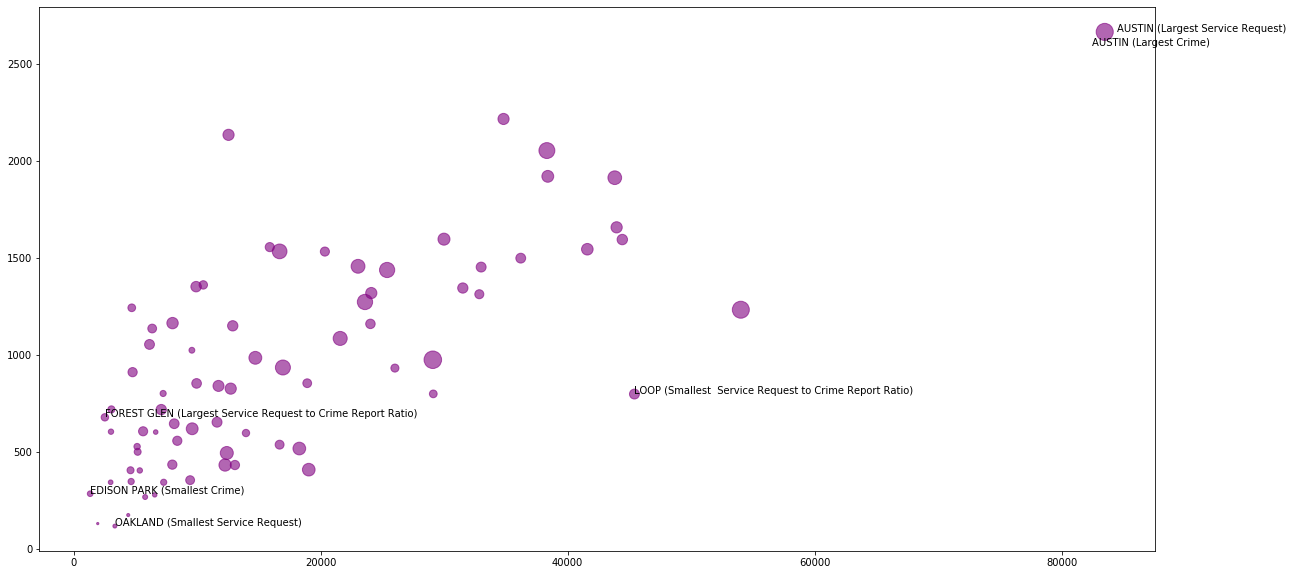

In [155]:
#community areas by crime by street

x=bycomm_pop['ID']
y=bycomm_pop['Service Request Number']
z=bycomm_pop['Community']
w=bycomm_pop['No. of Service Requests to Crime Reports']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x,y,s=bycomm_pop['Total Population']*.003,c='purple',alpha=0.6)

#Street light request data
y_max=y.max()
y_min=y.min()

i=bycomm_pop.loc[y==y_max, 'ID'].iloc[0]
j=bycomm_pop.loc[y==y_max, 'Service Request Number'].iloc[0]
ax.annotate(bycomm_pop.loc[y==y_max, 'Community'].iloc[0] + " (Largest Service Request)", xy=(i+1000, j))

k=bycomm_pop.loc[y==y_min, 'ID'].iloc[0]
m=bycomm_pop.loc[y==y_min, 'Service Request Number'].iloc[0]
ax.annotate(bycomm_pop.loc[y==y_min, 'Community'].iloc[0] + " (Smallest Service Request)", xy=(k, m))

#Crime numbers
x_max=x.max()
x_min=x.min()

n=bycomm_pop.loc[x==x_max, 'ID'].iloc[0]
p=bycomm_pop.loc[x==x_max, 'Service Request Number'].iloc[0]
ax.annotate(bycomm_pop.loc[x==x_max, 'Community'].iloc[0] + " (Largest Crime)", xy=(n-1000, p-75))

q=bycomm_pop.loc[x==x_min, 'ID'].iloc[0]
r=bycomm_pop.loc[x==x_min, 'Service Request Number'].iloc[0]
ax.annotate(bycomm_pop.loc[x==x_min, 'Community'].iloc[0] + " (Smallest Crime)", xy=(q, r))

#Service Request to Crime ratio
w_max=w.max()
w_min=w.min()

t=bycomm_pop.loc[w==w_max, 'ID'].iloc[0]
u=bycomm_pop.loc[w==w_max, 'Service Request Number'].iloc[0]
ax.annotate(bycomm_pop.loc[w==w_max, 'Community'].iloc[0] + " (Largest Service Request to Crime Report Ratio)", xy=(t, u))

a=bycomm_pop.loc[w==w_min, 'ID'].iloc[0]
b=bycomm_pop.loc[w==w_min, 'Service Request Number'].iloc[0]
print(a)
print(b)
ax.annotate(bycomm_pop.loc[w==w_min, 'Community'].iloc[0] + " (Smallest  Service Request to Crime Report Ratio)", xy=(a, b))

In [156]:
#https://www.kaggle.com/threadid/geopandas-mapping-chicago-crimes 

street_map= gpd.read_file(r'C:\Users\dharti.patel\Desktop\NU_DS_Project1\Street-Lights\Street-Lights\geo_export_f11eb402-3887-43c2-a681-95fde0bf6fbf.shp')

# fig,ax=plt.subplots(figsize=(15,15))
# street_map.plot(ax=ax)

[Text(0.5, 1, 'Street Light Outages 2018')]

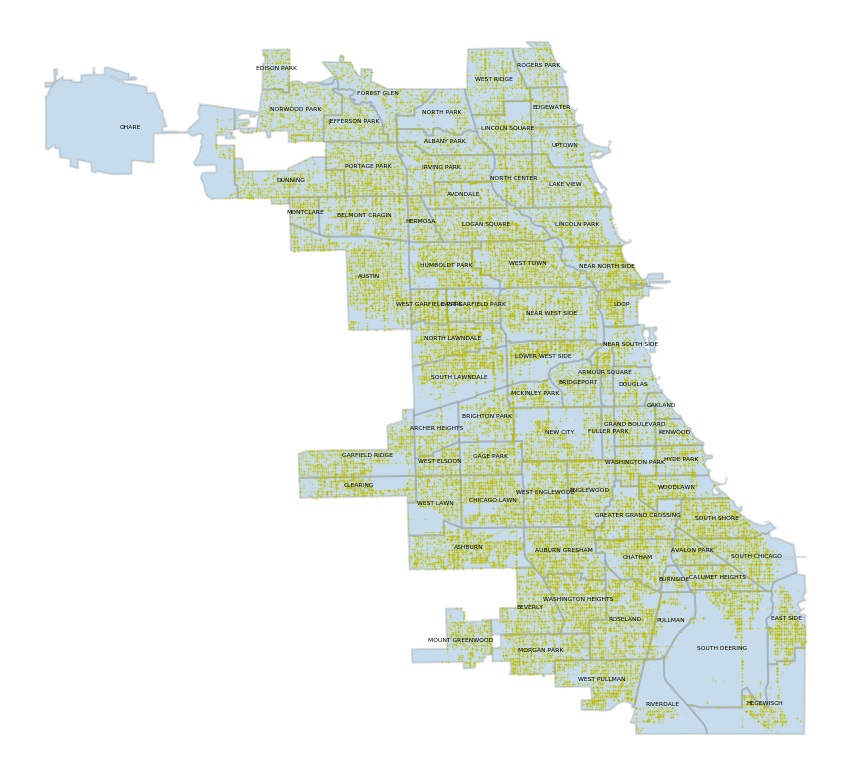

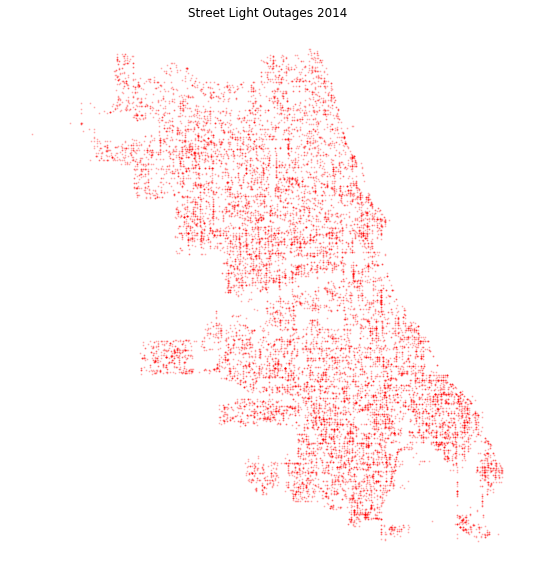

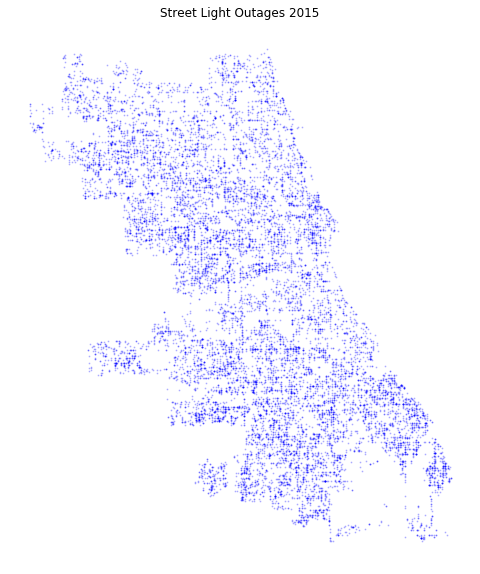

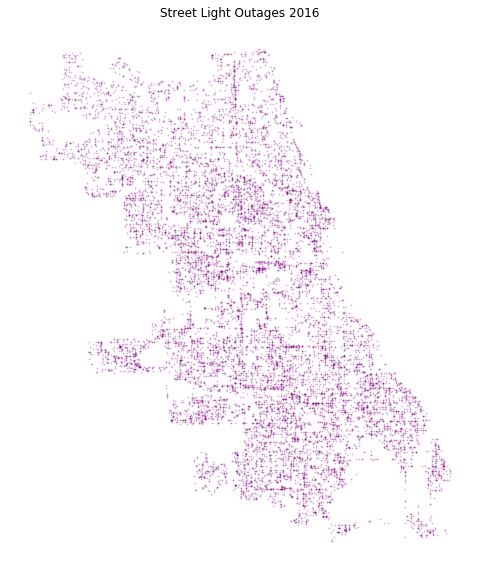

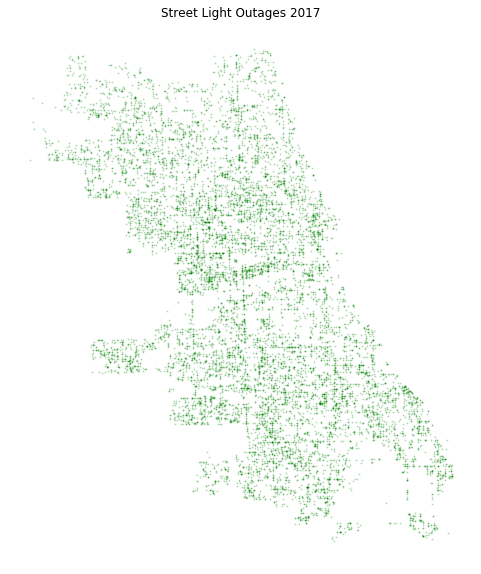

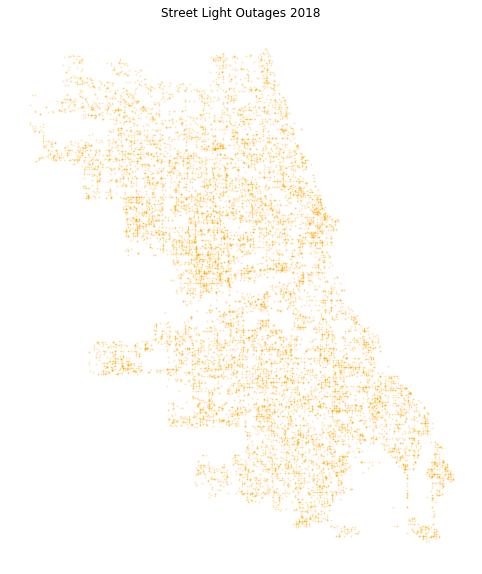

In [157]:
#Street Lights

crs={'init':'epsg:4326'}
street_comm.dtypes
street_comm.head()

geometry= [Point(xy) for xy in zip(street_comm["Longitude"],street_comm["Latitude"])]
geometry[:3]


geo_df=gpd.GeoDataFrame(street_comm,
                       crs=crs,
                       geometry=geometry)
geo_df.head()

# fig.ax=plt.subplots(figsize=(15,15))
# street_map.plot(ax=ax,alpha=0.4,color="grey")
# geo_df[geo_df[geometry]==0].plot(ax=ax,markersize=20,color="blue",marker="o",label="Neg")
# # geo_df[geo_df['WnvPresent']==0].plot(ax=ax,markersize=20,color="red",marker="^",label="Pos")
# # plt.legend(plot={'size':15})

street_loc_df = geo_df.dropna(inplace=False)  # Remove all nan entries. 
street_loc_df = street_loc_df.drop(street_loc_df[(street_loc_df.Latitude < 41.0)].index) #Remove bad values in Long/Lat 
street_loc_df['AREA_NUMBE'] = street_loc_df['AREA_NUMBE'].astype(int)
street_geometry = [Point(xy) for xy in zip(street_loc_df.Longitude, street_loc_df.Latitude)]
# street_geometry = geo_df['geometry']

street_crs = {'type': 'EPSG', 'properties': {'code': 102671}}
street_points = GeoDataFrame(street_loc_df, crs=street_crs, geometry=street_geometry)
street_points.head(5)

# street_map = geo_df.plot(figsize=(25,25), edgecolor='k', facecolor='b', alpha=0.25, linewidth=2) 

#Street lights data
# street_points = street_points.plot(figsize=(10,10), markersize=5) 
# street_points.set_axis_off()

# chistreet_map = street_map.plot(figsize=(25,25), edgecolor='#7f7f7f', cmap='nipy_spectral', alpha=0.5, linewidth=2) 
# street_map.apply(lambda x: chistreet_map.annotate(s=x.community, xy=x.geometry.centroid.coords[0], ha='center', size=16),axis=1);
# chistreet_map.set_axis_off()

chistreet_map = street_map.plot(figsize=(15,15), edgecolor='#7f7f7f', facecolor='#1f77b4', alpha=0.25, linewidth=2) 
street_map.apply(lambda x: chistreet_map.annotate(s=x.community, xy=x.geometry.centroid.coords[0], ha='center', size=6),axis=1);
street_points.plot(figsize=(25,25),ax=chistreet_map, markersize=1, color='y', alpha=0.25)
chistreet_map.set_axis_off()

#yearly streetlight visual

# for i in (2014,2015,2016,2017,2018):
#     street_vc_points = street_points.loc[street_points['Year'].isin([i])]

#     street_vc_points_map = street_vc_points.plot(figsize=(5,5), markersize=1, c='blue', alpha=0.2) 
#     street_vc_points_map.set_axis_off()
#     street_vc_points_map.set(title=i)
    
#yearly streetlight visual

street_vc_points = street_points.loc[street_points['Year'].isin(['2014'])]

street_vc_points_map = street_vc_points.plot(figsize=(10,10), markersize=1, c='red', alpha=0.2) 
street_vc_points_map.set_axis_off()
street_vc_points_map.set(title='Street Light Outages 2014')

street_vc_points = street_points.loc[street_points['Year'].isin(['2015'])]

street_vc_points_map = street_vc_points.plot(figsize=(10,10), markersize=1, c='blue', alpha=0.2) 
street_vc_points_map.set_axis_off()
street_vc_points_map.set(title='Street Light Outages 2015')

street_vc_points = street_points.loc[street_points['Year'].isin(['2016'])]

street_vc_points_map = street_vc_points.plot(figsize=(10,10), markersize=1, c='purple', alpha=0.2) 
street_vc_points_map.set_axis_off()
street_vc_points_map.set(title='Street Light Outages 2016')

street_vc_points = street_points.loc[street_points['Year'].isin(['2017'])]

street_vc_points_map = street_vc_points.plot(figsize=(10,10), markersize=1, c='green', alpha=0.2) 
street_vc_points_map.set_axis_off()
street_vc_points_map.set(title='Street Light Outages 2017')

street_vc_points = street_points.loc[street_points['Year'].isin(['2018'])]

street_vc_points_map = street_vc_points.plot(figsize=(10,10), markersize=1, c='orange', alpha=0.2) 
street_vc_points_map.set_axis_off()
street_vc_points_map.set(title='Street Light Outages 2018')



In [158]:
# Crime maps

[Text(0.5, 1, 'Crime: Battery (2018)')]

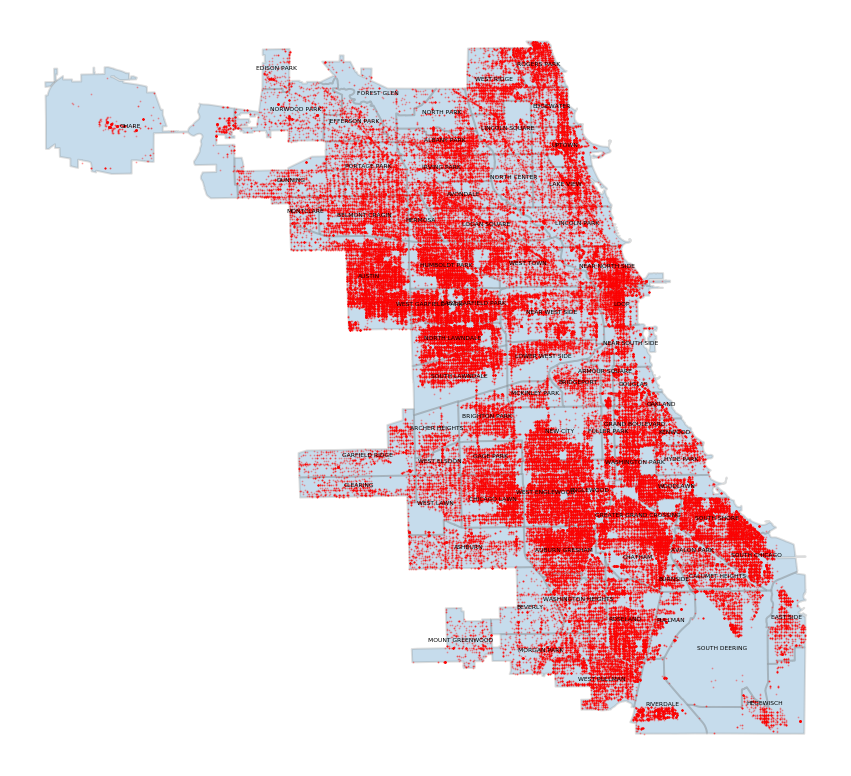

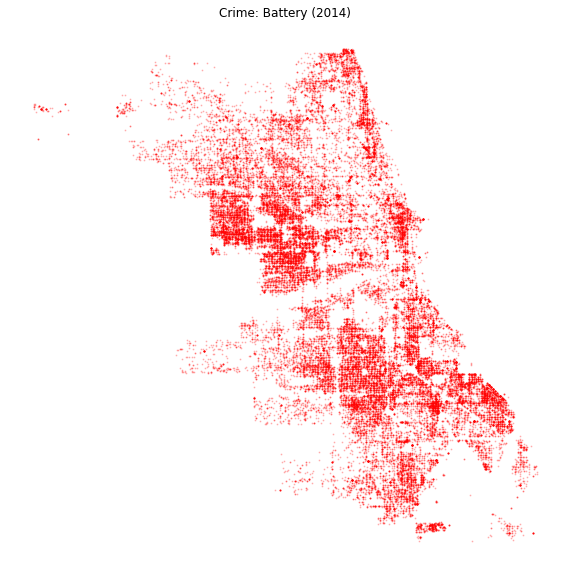

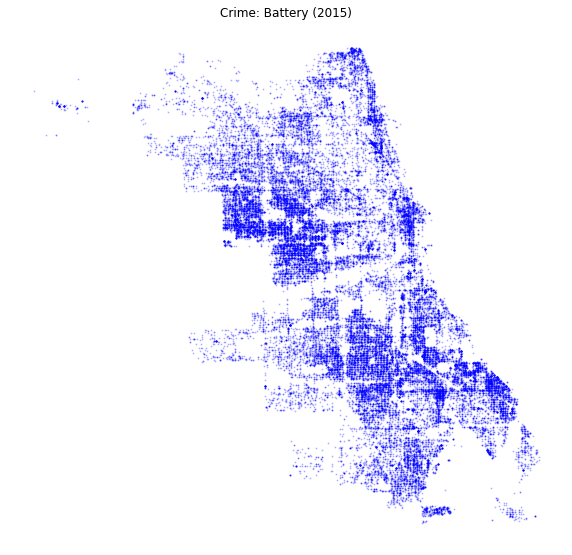

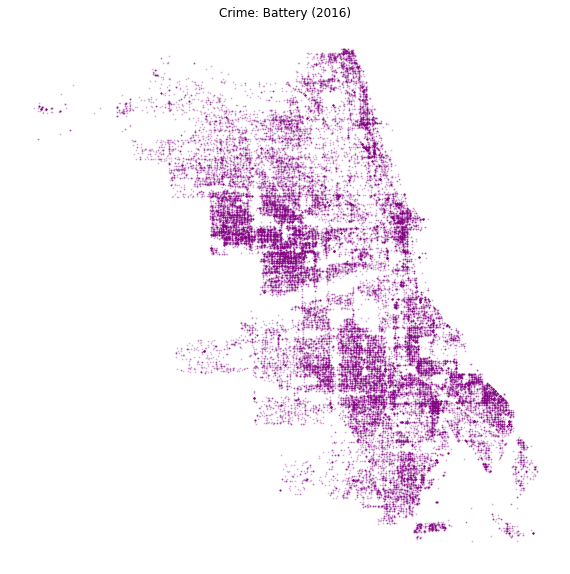

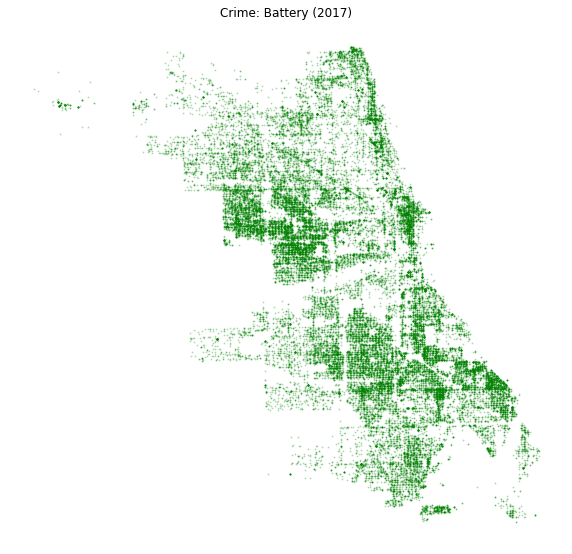

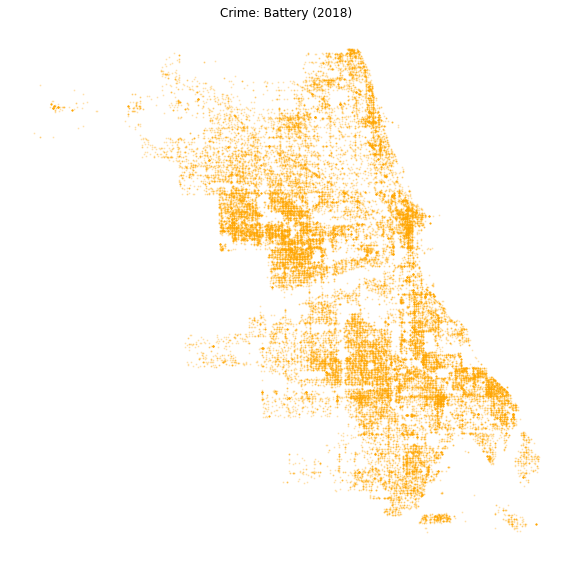

In [159]:
crime_comm['Primary Type'].unique()

crime_comm_type=crime_comm.loc[crime_comm['Primary Type']=='BATTERY']




crs={'init':'epsg:4326'}
crime_comm_type.dtypes
crime_comm_type.head()

geometry= [Point(xy) for xy in zip(crime_comm_type["Longitude"],crime_comm_type["Latitude"])]
geometry[:3]


geo_df=gpd.GeoDataFrame(crime_comm_type,
                       crs=crs,
                       geometry=geometry)
geo_df.head()

# fig.ax=plt.subplots(figsize=(15,15))
# crime_map.plot(ax=ax,alpha=0.4,color="grey")
# geo_df[geo_df[geometry]==0].plot(ax=ax,markersize=20,color="blue",marker="o",label="Neg")
# # geo_df[geo_df['WnvPresent']==0].plot(ax=ax,markersize=20,color="red",marker="^",label="Pos")
# # plt.legend(plot={'size':15})

crime_loc_df = geo_df.dropna(inplace=False)  # Remove all nan entries. 
crime_loc_df = crime_loc_df.drop(crime_loc_df[(crime_loc_df.Latitude < 41.0)].index) #Remove bad values in Long/Lat 
crime_loc_df['AREA_NUMBE'] = crime_loc_df['AREA_NUMBE'].astype(int)
crime_geometry = [Point(xy) for xy in zip(crime_loc_df.Longitude, crime_loc_df.Latitude)]
# crime_geometry = geo_df['geometry']

crime_crs = {'type': 'EPSG', 'properties': {'code': 102671}}
crime_points = GeoDataFrame(crime_loc_df, crs=crime_crs, geometry=crime_geometry)
crime_points.head(5)

# crime_map = geo_df.plot(figsize=(25,25), edgecolor='k', facecolor='b', alpha=0.25, linewidth=2) 

#crime lights data
# crime_points = crime_points.plot(figsize=(10,10), markersize=5) 
# crime_points.set_axis_off()

# chicrime_map = crime_map.plot(figsize=(25,25), edgecolor='#7f7f7f', cmap='nipy_spectral', alpha=0.5, linewidth=2) 
# crime_map.apply(lambda x: chicrime_map.annotate(s=x.community, xy=x.geometry.centroid.coords[0], ha='center', size=16),axis=1);
# chicrime_map.set_axis_off()

chicrime_map = street_map.plot(figsize=(15,15), edgecolor='#7f7f7f', facecolor='#1f77b4', alpha=0.25, linewidth=2) 
street_map.apply(lambda x: chicrime_map.annotate(s=x.community, xy=x.geometry.centroid.coords[0], ha='center', size=6),axis=1);
crime_points.plot(figsize=(25,25),ax=chicrime_map, markersize=1, color='r', alpha=0.25)
chicrime_map.set_axis_off()

#yearly streetlight visual

crime_vc_points = crime_points.loc[crime_points['Year'].isin(['2014'])]

crime_vc_points_map = crime_vc_points.plot(figsize=(10,10), markersize=1, c='red', alpha=0.2) 
crime_vc_points_map.set_axis_off()
crime_vc_points_map.set(title='Crime: Battery (2014)')

crime_vc_points = crime_points.loc[crime_points['Year'].isin(['2015'])]

crime_vc_points_map = crime_vc_points.plot(figsize=(10,10), markersize=1, c='blue', alpha=0.2) 
crime_vc_points_map.set_axis_off()
crime_vc_points_map.set(title='Crime: Battery (2015)')

crime_vc_points = crime_points.loc[crime_points['Year'].isin(['2016'])]

crime_vc_points_map = crime_vc_points.plot(figsize=(10,10), markersize=1, c='purple', alpha=0.2) 
crime_vc_points_map.set_axis_off()
crime_vc_points_map.set(title='Crime: Battery (2016)')

crime_vc_points = crime_points.loc[crime_points['Year'].isin(['2017'])]

crime_vc_points_map = crime_vc_points.plot(figsize=(10,10), markersize=1, c='green', alpha=0.2) 
crime_vc_points_map.set_axis_off()
crime_vc_points_map.set(title='Crime: Battery (2017)')

crime_vc_points = crime_points.loc[crime_points['Year'].isin(['2018'])]

crime_vc_points_map = crime_vc_points.plot(figsize=(10,10), markersize=1, c='orange', alpha=0.2) 
crime_vc_points_map.set_axis_off()
crime_vc_points_map.set(title='Crime: Battery (2018)')